In [1]:
import numpy as np
import pandas as pd
import importlib
import os
import pathlib
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
sys.path.append(f'{pathlib.Path(os.path.abspath("")).parents[0]}')

In [2]:
from scripts import read, cop, process, analyze, plot

# Import Data

### Ecobee

Imports the data through the "analyze" package. This assumes a processed "df_list" is located in "data/pickled_data". The default system is labeled gas, which refers to any non-heat pump (hp) system. Ecobee dict contains a dictionary of various dataframes used for later analysis.

To import data directly from csv files, run read.main(). This will pickle files in the "data_dir/df_lists" directory.

## data_dir

Should have the structure:
 - meta_data.csv
 - heat_loads
     - Contains alternative heat loads to compare to
 - df_lists
     - Contains pickled df_lists created by read.main()
 - Weather
     - location_dirs: Contains directories of locations with:
         - wind_speed.csv
         - solar files downloaded from NSRDB for various locations within analyzed region


In [3]:
# # To import data directly from csv files, run read.main()
# location = 'CA'
# data_dir = f'{pathlib.Path(os.path.abspath("")).parents[1]}/data'
# reduce_size = True
# season='winter'
# hp_only = True
# read.main(location, data_dir, reduce_size, season, hp_only)

In [4]:
# Imports df_lists into a dict for easier processing
# ecobee_dict = analyze.import_ecobee_data(location='NY', size='small', fuel_type='gas')
ecobee_dict = analyze.import_ecobee_data(location='CA', size='small', fuel_type='hp', season='summer')

In [5]:
ecobee_dict.keys()

dict_keys(['df_list', 'grouped_df', 'grouped_df_loc', 'grouped_daily'])

In [6]:
df_list = ecobee_dict['df_list']
grouped_df = ecobee_dict['grouped_df']
grouped_df_loc = ecobee_dict['grouped_df_loc']
grouped_daily = ecobee_dict['grouped_daily']

In [7]:
len(df_list)

110

In [8]:
df_list[0].columns

Index(['HvacMode', 'Event', 'Schedule', 'T_stp_cool', 'T_stp_heat', 'Humidity',
       'RH_out', 'T_ctrl_C', 'T_out_C', 'GHI_(kW/m2)', 'Wind Speed',
       '100m_Wind_Speed_(m/s)', 'effectiveHeat', 'effectiveElectricPower',
       'fan', 'Nearest_Lat'],
      dtype='object')

<AxesSubplot: xlabel='DateTime'>

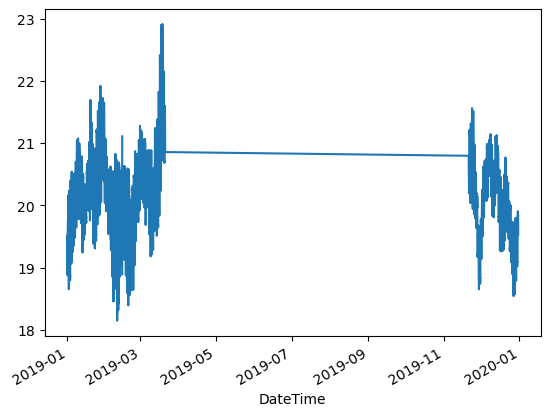

In [8]:
grouped_df['T_ctrl_C'].plot()

<AxesSubplot: >

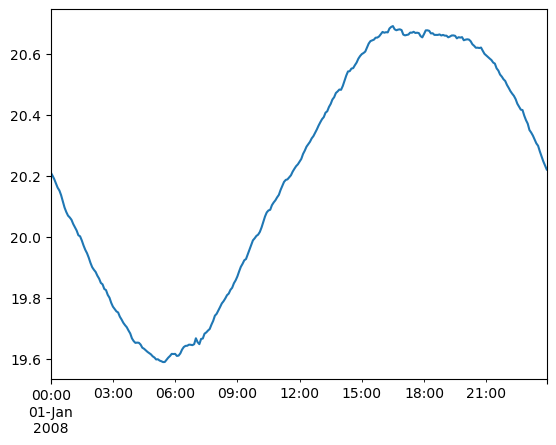

In [9]:
grouped_daily['T_ctrl_C'].plot()

In [10]:
df_list[0]

,HvacMode,Event,Schedule,T_stp_cool,T_stp_heat,Humidity,RH_out,T_ctrl_C,T_out_C,GHI_(kW/m2),Wind Speed,100m_Wind_Speed_(m/s),effectiveHeat,effectiveElectricPower,fan,Nearest_Lat
DateTime,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,auto,NaN,Sleep,74.0,65.0,24.0,17.0,20.000000,10.555555,0.0,4.0,4.204080,0.0,0.0,0.0,34.0625
2019-01-01 00:05:00,auto,NaN,Sleep,74.0,65.0,24.0,17.0,20.000000,10.555555,0.0,4.0,4.223848,0.0,0.0,0.0,34.0625
2019-01-01 00:10:00,auto,NaN,Sleep,74.0,65.0,24.0,17.0,20.000000,10.555555,0.0,4.0,4.243617,0.0,0.0,0.0,34.0625
2019-01-01 00:15:00,auto,NaN,Sleep,74.0,65.0,24.0,17.0,20.000000,10.555555,0.0,4.0,4.263385,0.0,0.0,0.0,34.0625
2019-01-01 00:20:00,auto,NaN,Sleep,74.0,65.0,24.0,17.0,20.000000,10.555555,0.0,4.0,4.283154,0.0,0.0,0.0,34.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:40:00,off,NaN,Sleep,74.0,65.0,38.0,44.0,17.777778,13.888889,0.0,3.8,5.388751,0.0,0.0,0.0,34.0625
2019-12-30 23:45:00,off,NaN,Sleep,74.0,65.0,38.0,44.0,17.777778,13.888889,0.0,3.8,5.426421,0.0,0.0,0.0,34.0625
2019-12-30 23:50:00,off,NaN,Sleep,74.0,65.0,38.0,44.0,17.777778,13.888889,0.0,3.8,5.464091,0.0,0.0,0.0,34.0625


<AxesSubplot: xlabel='DateTime'>

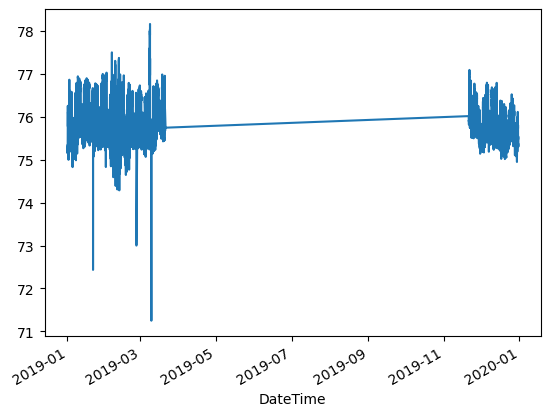

In [11]:
grouped_df['T_stp_cool'].plot()

### Other Loads

Imports other loads used as baseline comparisons. 

 - When2heat (https://github.com/oruhnau/when2heat)
 - Synpro (https://www.sciencedirect.com/science/article/abs/pii/S0378778815000845)
 - NREL (https://data.openei.org/submissions/153)

In [12]:
# # Daily Average
# when2heat_daily = analyze.import_other_heat_data('when2heat', location='DE', daily=True)   
# synpro_daily = analyze.import_other_heat_data('synpro', daily=True)   
# nrel_daily = analyze.import_other_heat_data('nrel', location='NYC', daily=True) 

# # Yearly Data
# when2heat = analyze.import_other_heat_data('when2heat', location='DE', daily=False)   
# # synpro_daily = analyze.import_other_heat_data('synpro', daily=True)   #Synpro does not give yearly data
# nrel = analyze.import_other_heat_data('nrel', location='NYC', daily=False) 

# Setpoint profiles

Plots the daily average setpoint profiles for the ecobee data

In [13]:
def plot_setpoints(grouped_df, start_time):
    """
    Plots daily setpoint profiles for weekdays vs weekends
    Args:
        grouped_df: timeseries, aggregated df
        day: ['weekday', 'weekend'] (not implemented yet)

    Returns:

    """
    grouped_df_daily = grouped_df.groupby(grouped_df.index.map(lambda t: t.minute + 60 * t.hour)).mean()
    grouped_df_daily.index = pd.date_range(start=start_time, freq='5T', periods=len(grouped_df_daily.index))

    with matplotlib.style.context('seaborn-whitegrid'):
        linesize = 2.5
        f, ax1 = plt.subplots(1, 1, figsize=(10, 5.4))
        ax1.plot(grouped_df_daily.index,
                 (grouped_df_daily.loc[:, 'T_stp_heat'] - 32) * 5 / 9,
                 color='k', linewidth=linesize, label='Setpoint')
        ax1.plot(grouped_df_daily.index,
                 grouped_df_daily.loc[:, 'T_ctrl_C'],
                 color='navy', linewidth=linesize, label='Indoor Temperature')
        # ax1.plot(grouped_df_daily.index,
        #          (grouped_df_daily.loc[:, 'T_stp_heat'] - 32) * 5 / 9,
        #          color='darkgreen', linewidth=linesize, label='Setpoint')
        # ax1.plot(grouped_df_daily.index,
        #          grouped_df_daily.loc[:, 'T_ctrl_C'],
        #          color='darkgreen', linewidth=linesize, label='Indoor Temperature', linestyle='--')
        #     ax1.axhline(1, linestyle='--', color='k', linewidth=3, label='Mean Demand')
        ax1.legend(fontsize=24, ncol=2)
        ax1.set_ylabel('Average\nTemperature ($^\circ$C)', fontsize=24)
        ax1.tick_params(axis='both', labelsize=20)
        daysFmt = mdates.DateFormatter('%m/%d/%y')
        hourFmt = mdates.DateFormatter('%H:%M')
        ax1.xaxis.set_major_locator(mdates.HourLocator(interval=4))
        ax1.xaxis.set_minor_locator(mdates.DayLocator())
        ax1.xaxis.set_major_formatter(hourFmt)
        ax1.set_xlabel('Time of Day', fontsize=24)
        # ax1.set_ylim((18, 20))
        plt.tight_layout()
        

    return f, ax1

In [14]:
grouped_df_daily = grouped_df.groupby(grouped_df.index.map(lambda t: t.minute + 60 * t.hour)).mean()
grouped_df_daily.shape

(288, 15)

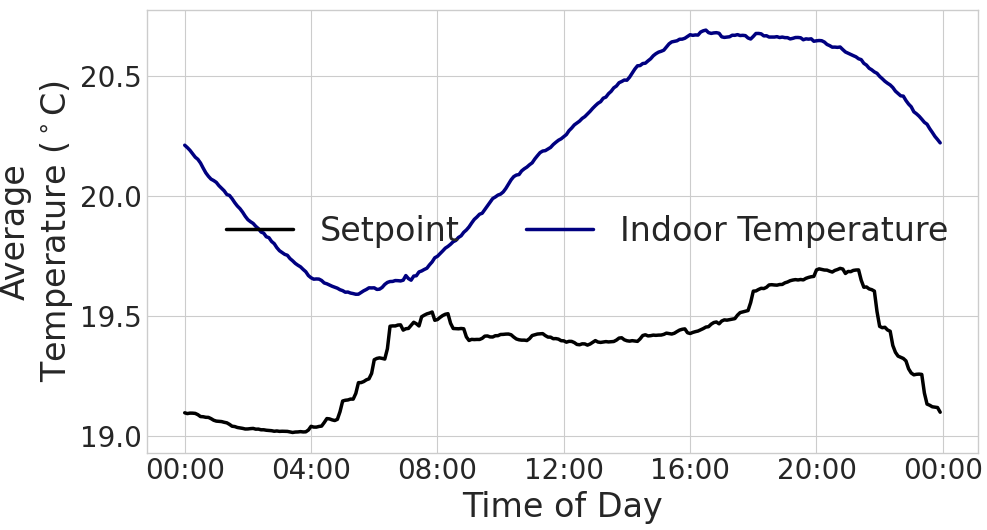

In [15]:
start_time = '01/02/08 00:00'
day = 'weekday'
fig, ax = plot_setpoints(ecobee_dict['grouped_df'], start_time=start_time)
# fig.savefig(f'../plots/average_setpoint_{day}.pdf', dpi=300)


# Daily Profile

Plots the daily average heating demand profiles for a list of input data.

In [16]:
def plot_daily_heating_demand(data_list, label_list, color_list=None, style_list=None):
    """
    Plots the daily heating demand profile for each df in the data_list. data_list should be a grouded_daily_df of
    only 24 hours.
    Args:
        data_list: data_list should be a grouded_daily_df of only 24 hours.
        label_list: labels to put in the legend
        color_list: colors for each data entry
        style_list: linestyle for each data entry

    Returns:

    """
    if color_list is None:
        color_list = ['navy', 'red', 'purple', 'green', 'green']
    if style_list is None:
        style_list = ['-', '-', '-', '-', '--']

    f, ax1 = plt.subplots(1, 1, figsize=(10, 6))
    for n, df in enumerate(data_list):
        ax1.plot(df.index,
                 df,
                 label=label_list[n],
                 color=color_list[n],
                 linewidth=3,
                 linestyle=style_list[n],
                 )
        print(label_list[n], df.max())

    ax1.axhline(1, linestyle='--', color='k', linewidth=3, label='Mean Demand')

    handles, labels = ax1.get_legend_handles_labels()
    idxs = [0, 1] # order for legend labels
    handles, labels = [handles[idx] for idx in idxs], [labels[idx] for idx in idxs]
    # sort both labels and handles by labels
    ax1.legend(handles, labels, fontsize=20)
    # ax1.set_ylim(0, 2.25)
    ax1.set_ylabel('Normalized Heating\n Demand', fontsize=24)

    daysFmt = mdates.DateFormatter('%m/%d/%y')
    hourFmt = mdates.DateFormatter('%H:%M')
    ax1.tick_params(axis='both', labelsize=22)
    #     ax1.set_ylim(0, .75)
    ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=range(4, 23, 4)))
    ax1.xaxis.set_minor_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(hourFmt)
    ax1.set_xlabel('Time of Day', fontsize=24)
    ax1.set_xlim((df.index[0], df.index[-1]))
    ax1.grid(True)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.01)

    return f, ax1

Smart Thermostat Data 2.026642553889093
Smart Thermostat HP Data 2.026642553889093


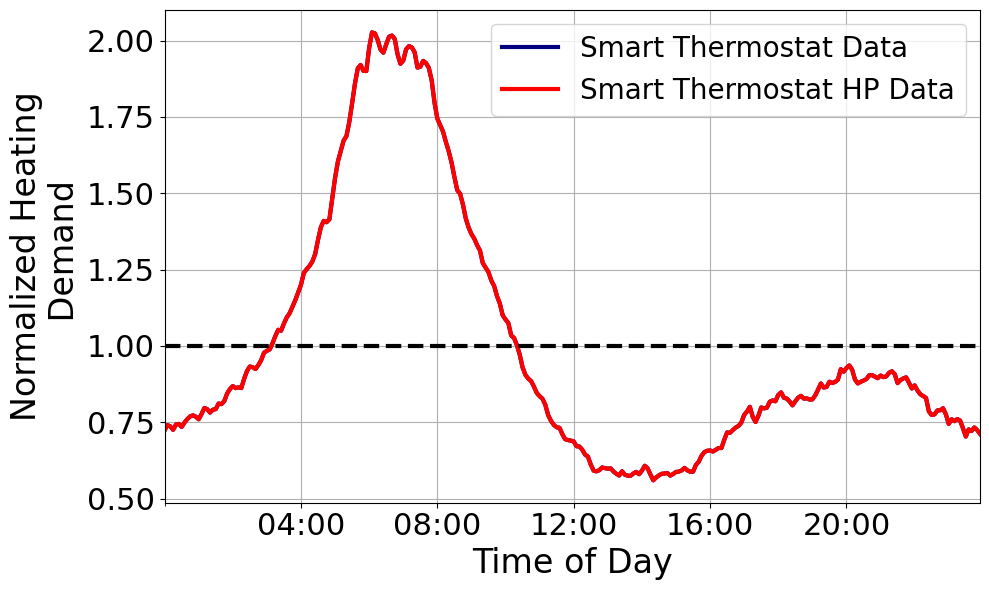

In [17]:
data_list = [
    ecobee_dict['grouped_daily']['effectiveHeatNorm'],
    ecobee_dict['grouped_daily']['effectiveHeatNorm']
]

label_list = [
    'Smart Thermostat Data',
    'Smart Thermostat HP Data'
]

fig, ax = plot_daily_heating_demand(data_list=data_list,
                                    label_list=label_list)
fig.savefig('../plots/normalized_all.pdf', dpi=300)
plt.show()

## Daily Peaks

Plots a histogram of the daily peak loads and their averages. `data_peaks` gives the contains the peak heating demand for each day in the corresponding dataset.

In [18]:
def get_daily_peaks(grouped_df):
    """
    Groups the aggregated timeseries data into daily peak.
    Args:
        grouped_df:

    Returns:

    """
    if type(grouped_df) == dict:
        peaks = {
            key: df.loc[df.groupby(pd.Grouper(freq='D')).idxmax()] for key, df in
            zip(grouped_df.keys(), grouped_df.values())}
        years = list(grouped_df.keys())
        peaks = pd.concat(peaks[year] for year in years)
    else:
        grouped_df = grouped_df[grouped_df.index.month <= 3]
        peaks = grouped_df.loc[grouped_df.groupby(pd.Grouper(freq='D')).idxmax()]
    return peaks

In [19]:
ecobee_peaks = get_daily_peaks(ecobee_dict['grouped_df']['effectiveHeatNorm'])
ecobee_peaks
# nrel_peaks = analyze.get_daily_peaks(nrel)
# when2heat_peaks = analyze.get_daily_peaks(when2heat)

DateTime
2019-01-01 07:20:00    3.655292
2019-01-02 06:45:00    4.166829
2019-01-03 06:55:00    4.051367
2019-01-04 06:20:00    3.912035
2019-01-05 07:55:00    3.116157
                         ...   
2019-03-17 07:15:00    1.149177
2019-03-18 07:15:00    0.935237
2019-03-19 06:30:00    0.692126
2019-03-20 07:40:00    0.638849
2019-03-21 00:00:00    0.203925
Name: effectiveHeatNorm, Length: 80, dtype: float64

In [20]:
ecobee_dict['grouped_df']['effectiveHeatNorm']


DateTime
2019-01-01 00:00:00    1.677108
2019-01-01 00:05:00    1.620839
2019-01-01 00:10:00    1.392110
2019-01-01 00:15:00    1.434494
2019-01-01 00:20:00    1.601109
                         ...   
2019-02-25 18:35:00    0.000000
2019-02-25 18:40:00    0.000000
2019-02-25 18:45:00    0.000000
2019-02-25 18:50:00    0.000000
2019-02-25 18:55:00    0.000000
Name: effectiveHeatNorm, Length: 34022, dtype: float64

In [21]:
def plot_daily_peaks(data_list, label_list, color_list=None):
    """
    Plots the histogram of daily peaks
    Args:
        data_list: data_list should be a grouded_df of the full analyzed time period
        label_list: labels to put in the legend
        color_list: colors for each data entry

    Returns:

    """
    if color_list is None:
        color_list = ['green', 'purple', 'navy']
    with matplotlib.style.context('seaborn-paper'):
        f, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

        for n, data in enumerate(data_list):
            weights = 1/(len(data)/90)
            g = sns.histplot(x=data, ax=axs[n], color=color_list[n], binwidth=.25, binrange=[.25, 3.5], weights=weights,
                             legend=False)
            sns.histplot(np.arange(-3, -1), color=color_list[n], ax=axs[1], label=label_list[n])
            axs[n].axvline(data.mean(), color='k', linestyle='--', linewidth=3, label='Mean')
            print(label_list[n], data.mean())

        for ax in axs:
            ax.tick_params(labelsize=16)
            # ax1.tick_params(labelsize=12, which='minor')
            # ax1.set_ylim(0, .5)
            ax.grid(True)
            ax.set_xlim(0.1, 3.6)
            ax.set_ylim(0, 29)
            ax.set_ylabel('')

        axs[1].set_ylabel('Number of Days per Year', fontsize=20)
        axs[-1].set_xlabel('Daily Peak Normalized Heating Demand', fontsize=20)

        handles, labels = axs[1].get_legend_handles_labels()
        idxs = [1, 2, 3, 0] # order for legend labels
        handles, labels = [handles[idx] for idx in idxs], [labels[idx] for idx in idxs]
        # sort both labels and handles by labels
        axs[1].legend(handles, labels, fontsize=12)

        # axs[1].legend(fontsize=12)
        # plt.savefig('plots/daily_peak_distribution.pdf', dpi=300)
        plt.subplots_adjust(hspace=0)
        plt.tight_layout()
        return f, axs

In [22]:
ecobee_peaks

DateTime
2019-01-01 07:20:00    3.655292
2019-01-02 06:45:00    4.166829
2019-01-03 06:55:00    4.051367
2019-01-04 06:20:00    3.912035
2019-01-05 07:55:00    3.116157
                         ...   
2019-03-17 07:15:00    1.149177
2019-03-18 07:15:00    0.935237
2019-03-19 06:30:00    0.692126
2019-03-20 07:40:00    0.638849
2019-03-21 00:00:00    0.203925
Name: effectiveHeatNorm, Length: 80, dtype: float64

Smart Thermostat Data (NYS) 2.3667905215504517


IndexError: list index out of range

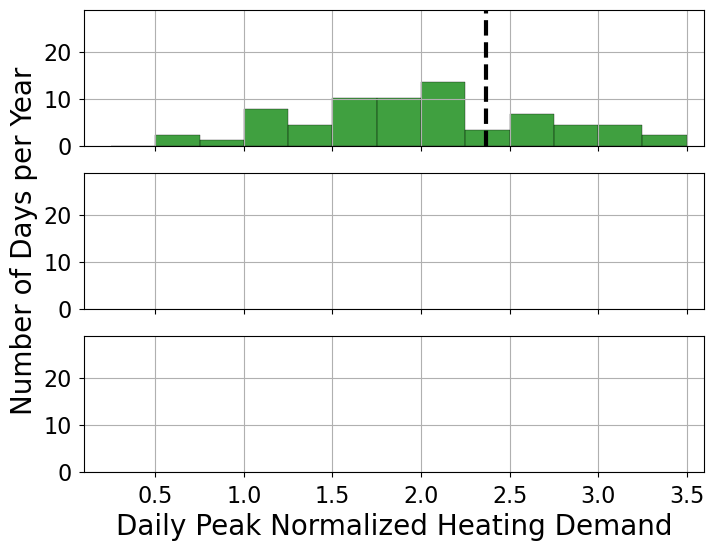

In [23]:
f, axs = plot.plot_daily_peaks([ecobee_peaks],
                              label_list=['Smart Thermostat Data (NYS)'])

## Renewable Correlation

Plots the correlation with renewable energy. "High Demand, Low Resource Periods" refers to times where wind is below the `wind_thresh`, solar is below the `solar_thresh`, and heating demand is above `demand_thresh`. Each dot represents a different time period corresponding to the `resample_freq`.

In [ ]:
def plot_renewable_correlation(grouped_loc_df, low_resource_high_demand):
    """
    Box/strip plots of renewable energy correlation to heating demand. Also plots low_resource_high_demand periods in
    red.
    Args:
        grouped_loc_df: timeseries dataframe of each clustered region separated into a multi index of [time, location]
        low_resource_high_demand: Periods defined by thresholds in analyze.renewable_correlation()

    Returns:

    """
    grouped_loc_df_clipped = grouped_loc_df.drop(index = low_resource_high_demand.index)

    with matplotlib.style.context('seaborn-paper'):
        fig1, (ax1) = plt.subplots(1, 1, figsize=(8, 4))
        for ax in [ax1]:
            ax.tick_params(labelsize=16)
            # ax1.tick_params(labelsize=12, which='minor')
            # ax1.set_ylim(0, .5)
            ax.grid(True)
            ax.set_ylabel('Normalized Heating\n Demand', fontsize=20)

        box_palette = sns.color_palette('Blues_d', 7)
        strip_palette = sns.color_palette('Blues_d', 7, desat=.5)
        jitter = True
        alpha = .35

        sns.boxplot(data=grouped_loc_df, x='solar_bins', y='effectiveHeatNorm',
                    ax=ax1, fliersize=0, palette=box_palette)
        sns.stripplot(data=grouped_loc_df_clipped, x='solar_bins', y='effectiveHeatNorm',
                      ax=ax1, dodge=False, jitter=jitter,
                      alpha=alpha, palette=strip_palette)
        sns.stripplot(data=low_resource_high_demand, x='solar_bins', y='effectiveHeatNorm',
                      ax=ax1, dodge=False, jitter=jitter,
                      alpha=.5, color='indianred')
        # ax1.scatter(0, -1, label='High Demand, Low Resource Periods', color='indianred')
        ax1.scatter(0, -1, label='15 Minute Time Periods', color='navy', alpha=alpha)

        ax1.set_xticks(ticks=[-.5, .5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax1.set_xticklabels(labels=np.arange(0, 1, .125))
        ax1.set_ylim((-.1, 3.5))
        ax1.set_ylabel('Normalized Heating\nDemand')
        ax1.set_xlabel('Local Global Horizontal Irradiance (GHI) (kW/m2)', fontsize=20)
        ax1.grid(True)
        ax1.legend(fontsize=14,framealpha=.5 )

        plt.tight_layout()
        # plt.savefig('plots/demand_vs_solar.png', dpi=300)

        fig2, (ax2) = plt.subplots(1, 1, figsize=(8, 4))
        for ax in [ax1, ax2]:
            ax.tick_params(labelsize=16)
            # ax1.tick_params(labelsize=12, which='minor')
            # ax1.set_ylim(0, .5)
            ax.grid(True)
            ax.set_ylabel('Normalized Heating\n Demand', fontsize=20)

        sns.boxplot(data=grouped_loc_df, x='wind_bins', y='effectiveHeatNorm',
                    ax=ax2, fliersize=0, palette=box_palette)
        sns.stripplot(data=grouped_loc_df_clipped, x='wind_bins', y='effectiveHeatNorm',
                      ax=ax2, dodge=False, jitter=jitter,
                      alpha=alpha, palette=strip_palette)
        sns.stripplot(data=low_resource_high_demand, x='wind_bins', y='effectiveHeatNorm',
                      ax=ax2, dodge=False, jitter=jitter,
                      alpha=.5, color='indianred')
        ax2.scatter(0, -1, label='High Demand, Low Resource Periods',
                    color='indianred')
        ax2.scatter(0, -1, label='15 Minute Time Periods', color='navy', alpha=alpha)
        ax2.legend(fontsize=14, framealpha=.5, loc='upper right')


        ax2.set_xticks(ticks=[-.5, .5, 1.5, 2.5, 3.5, 4.5, 5.5])
        # ax2.set_xticklabels(labels=np.arange(0, 5.5, .75))
        # ax2.set_xticks(ticks=np.arange(-.5, 21, 3))
        ax2.set_xticklabels(labels=np.arange(0., 19., 3.))
        ax2.set_ylim((-.1, 3.5))
        ax2.set_ylabel('Normalized Heating\nDemand')
        ax2.set_xlabel('Local 100m Wind Speed (m/s)', fontsize=20)
        ax2.grid(True)
        plt.tight_layout()
        
        return fig1, fig2, ax1, ax2

High Demand, Low Resource:  106
High Demand 1167
Percent:  0.0908311910882605


C:\Users\by276\AppData\Local\Temp\13\ipykernel_309568\2990617285.py:30: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=grouped_loc_df_clipped, x='solar_bins', y='effectiveHeatNorm',
C:\Users\by276\AppData\Local\Temp\13\ipykernel_309568\2990617285.py:60: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=grouped_loc_df_clipped, x='wind_bins', y='effectiveHeatNorm',
C:\Users\by276\AppData\Local\Temp\13\ipykernel_309568\2990617285.py:60: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.stripplot(data=grouped_loc_df_clipped, x='wind_bins', y='effectiveHeatNorm',


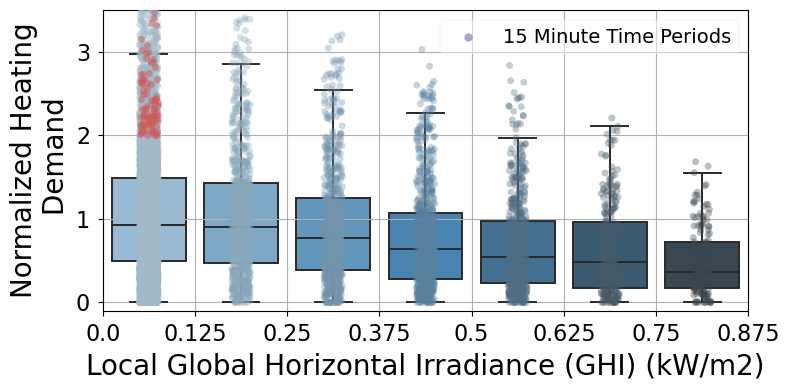

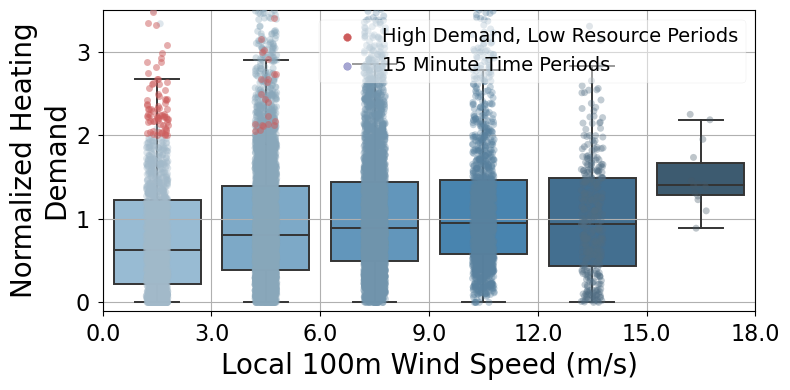

In [ ]:
grouped_loc_df_resample, low_resource_high_demand = analyze.renewable_correlation(ecobee_dict['grouped_df_loc'], resample_freq='15T', 
                                        wind_thresh=3.5, solar_thresh=.05, demand_thresh=2)
fig1, fig2, ax1, ax2 = plot_renewable_correlation(grouped_loc_df_resample, low_resource_high_demand)

fig1.savefig('../plots/demand_vs_solar.png', dpi=300)
fig2.savefig('../plots/demand_vs_wind.png', dpi=300)

In [ ]:
def plot_renewable_time(grouped_loc_df, low_resource_high_demand, color_list=None):  #TODO

    if color_list is None:
        color_list = ['navy', 'orange', 'purple', 'green']
    df_mean = grouped_loc_df.groupby('heat_bins').mean()
    with matplotlib.style.context('seaborn-paper'):
        f, ax1 = plt.subplots(1, 1, figsize=(8, 4),
                              # subplot_kw={"projection": "3d"}
                              )
        N = df_mean.shape[0]
        width=.45
        ind = np.arange(N)
        ax1.bar(ind-width/2, df_mean['100m_Wind_Speed_(m/s)'], width,
                color='navy', alpha=.75,
                label='Wind',
                linewidth=3)
        ax1.bar(ind, 0, 0, label='GHI',
                color='green', alpha=.75,
                )
        ax1_2 = ax1.twinx()
        ax1_2.bar(ind+width/2, df_mean['GHI_(kW/m2)'], width,
                  color='green', alpha=.75,
                  linewidth=3)

        ax1.set_ylabel('Mean Local 100m\nWind Speed (m/s)', fontsize=16)
        ax1_2.set_ylabel('Mean Local GHI (kW/m2)', fontsize=16)

        ax1.tick_params(labelsize=16)
        ax1_2.tick_params(labelsize=16)
        ax1.set_xlabel('Normalized Heating Demand', fontsize=20)
        ax1.set_xticks(range(0, 14, 2))
        ax1.set_xticklabels(labels=[0 + .5 * i for i in range(7)])
        ax1_2.set_yticks([0, .05, .10, .15, .20])
        ax1.set_yticks([0., 2.5, 5.0, 7.5, 10.0])
        ax1.set_ylim(0, 11.25)
        ax1_2.set_ylim(0, .225)
        ax1.legend(ncol=2, fontsize=16)
        ax1.grid(True)
    plt.tight_layout()

    return f, ax1

High Demand, Low Resource:  106
High Demand 1167
Percent:  0.0908311910882605


C:\Users\by276\AppData\Local\Temp\13\ipykernel_309568\386864517.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = grouped_loc_df.groupby('heat_bins').mean()


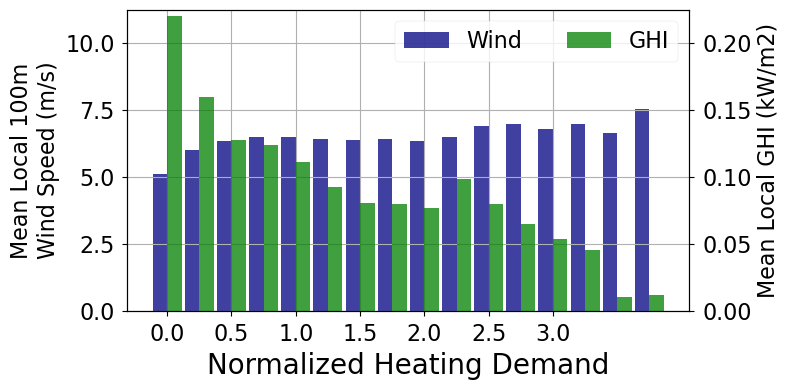

In [ ]:
fig, axs = plot_renewable_time(*analyze.renewable_correlation(ecobee_dict['grouped_df_loc'], resample_freq='15T', 
                                        wind_thresh=3.5, solar_thresh=.05, demand_thresh=2))
fig.savefig('../plots/wind_and_solar.pdf', dpi=300)